# TASK 3 - Car Price Prediction Using Machine Learning


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
import joblib
from tkinter import *

In [2]:
# Load the dataset
data = pd.read_csv('car data.xls')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 301
Number of Columns 9


# Perform data preprocessing steps

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:

data.drop(['Car_Name'], axis=1, inplace=True)
data['Age'] = 2023 - data['Year']
data.drop(['Year'], axis=1, inplace=True)

In [10]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


# Outlier Removal

<AxesSubplot:xlabel='Selling_Price'>

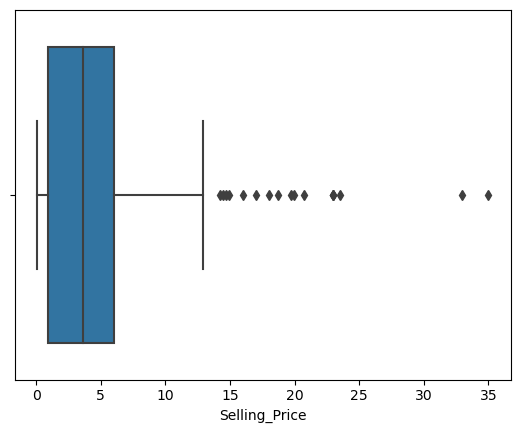

In [11]:

sns.boxplot(data['Selling_Price'])

In [12]:
sorted(data['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [13]:
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

In [14]:
data.shape

(299, 8)

# Encode categorical variables

In [15]:

label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type'] = label_encoder.fit_transform(data['Seller_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

In [16]:
data['Fuel_Type']

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 299, dtype: int32

In [17]:
data['Seller_Type']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Seller_Type, Length: 299, dtype: int32

In [18]:
data['Transmission']

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Transmission, Length: 299, dtype: int32

# Split the dataset into features (X) and target variable (y)

In [19]:

X = data.drop(['Selling_Price'], axis=1)
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6
3,4.15,5200,2,0,1,0,12
4,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,7
297,5.90,60000,2,0,1,0,8
298,11.00,87934,2,0,1,0,14
299,12.50,9000,1,0,1,0,6


In [20]:
y = data['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# Split the data into training and testing sets

In [21]:

from sklearn.model_selection import train_test_split

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
#Import The models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Train different regression models

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Evaluate model performance

In [26]:

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_xg = xg.predict(X_test)



In [27]:
score_lr = metrics.r2_score(y_test, y_pred_lr)
score_rf = metrics.r2_score(y_test, y_pred_rf)
score_gbr = metrics.r2_score(y_test, y_pred_gbr)
score_xg = metrics.r2_score(y_test, y_pred_xg)


In [28]:
print(score_lr,score_rf,score_gbr,score_xg)

0.6790884983129402 0.7385186019472878 0.8808536102478067 0.8864839405756888


In [29]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
             "R2_SCORE":[score_lr,score_rf,score_gbr,score_xg]})

In [30]:
final_data

,Models,R2_SCORE
0,LR,0.679088
1,RF,0.738519
2,GBR,0.880854
3,XG,0.886484


# Save the best model

In [31]:

best_model = xg
joblib.dump(best_model, 'car_price_predictor.joblib')

['car_price_predictor.joblib']

# Visualization 

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

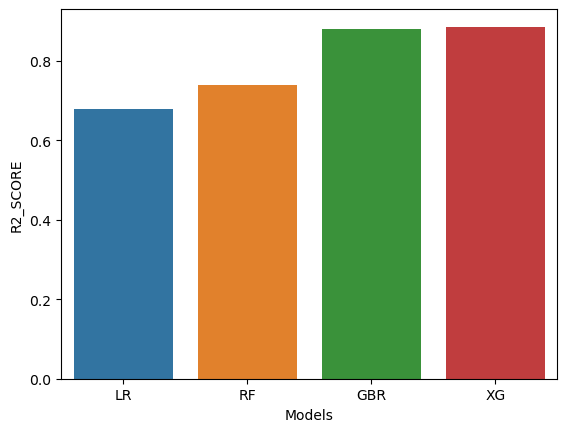

In [53]:
sns.barplot(final_data['Models'],final_data['R2_SCORE'])

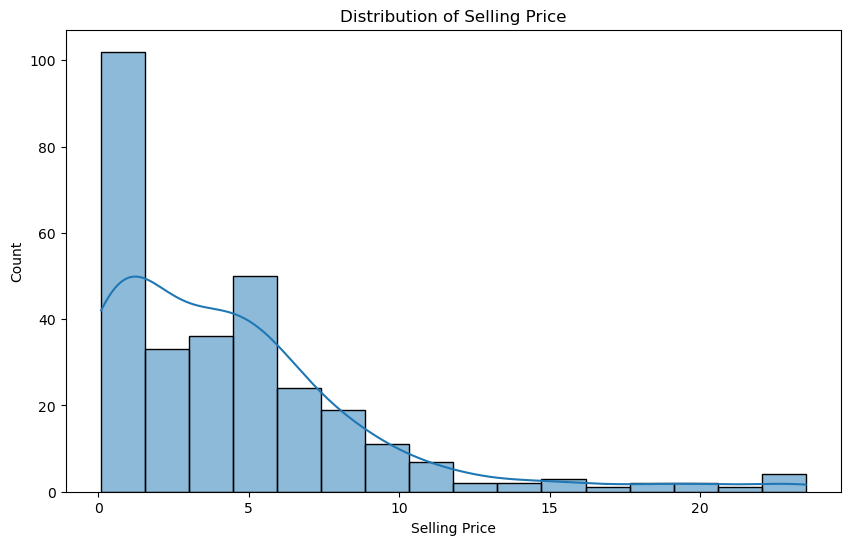

In [33]:
# Plotting the distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

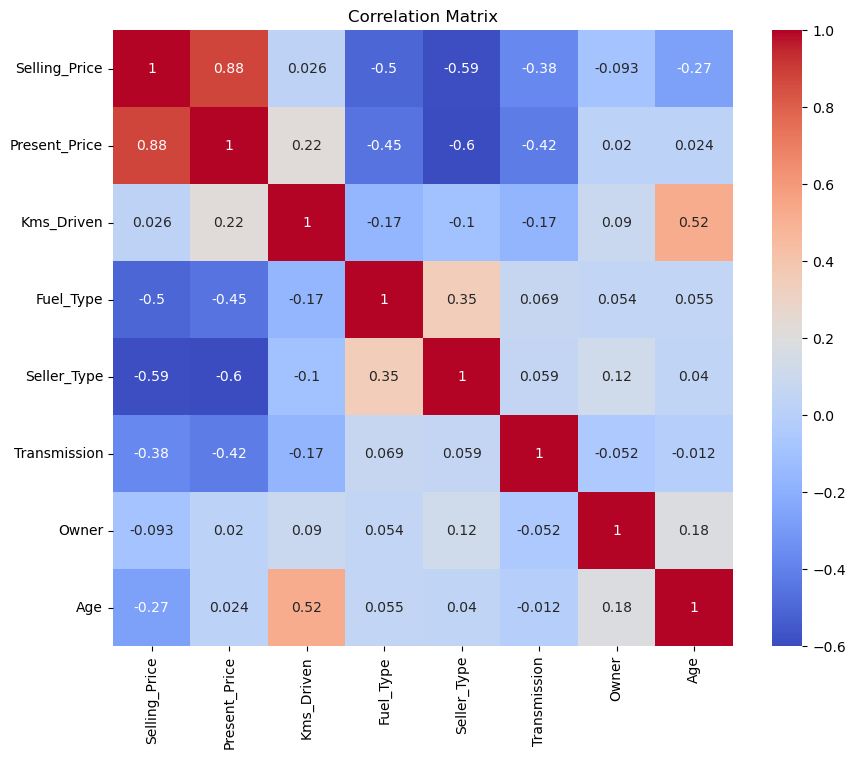

In [34]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# creating GUI

In [51]:
import tkinter as tk
from tkinter import messagebox

def calculate_price():
    make = make_entry.get()
    year = int(year_entry.get())
    present_price = float(present_price_entry.get())
    
    # Perform calculations and display result
    selling_price = present_price * 1.2  # Just a placeholder calculation
    messagebox.showinfo("Result", f"The estimated selling price for {make} is: {selling_price}")

# Create the main window
window = tk.Tk()
window.title("Car Selling Price Predictor")

# Create labels
make_label = tk.Label(window, text="Car Make:")
year_label = tk.Label(window, text="Year:")
present_price_label = tk.Label(window, text="Present Price:")

# Create entry fields
make_entry = tk.Entry(window)
year_entry = tk.Entry(window)
present_price_entry = tk.Entry(window)

# Create calculate button
calculate_button = tk.Button(window, text="Predict", command=calculate_price)

# Arrange the labels and entry fields in a grid
make_label.grid(row=0, column=0, padx=10, pady=10)
make_entry.grid(row=0, column=1, padx=10, pady=10)
year_label.grid(row=1, column=0, padx=10, pady=10)
year_entry.grid(row=1, column=1, padx=10, pady=10)
present_price_label.grid(row=2, column=0, padx=10, pady=10)
present_price_entry.grid(row=2, column=1, padx=10, pady=10)

# Arrange the calculate button
calculate_button.grid(row=3, columnspan=2, padx=10, pady=10)

# Start the GUI event loop
window.mainloop()
